In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_percentage_error
# Load the data from the CSV file
data = pd.read_csv('/Users/jarkrunglerdkriangkrai/ISE/Year 4/Semester 2/Big Data/repo/big_data_ai-1/imdp.csv',encoding='latin-1')



#
#
#
#
#
### EDA

In [2]:
df1 = data

# Check the first five rows of the data
print(df1.head())

       director_name  num_critic_for_reviews  duration  \
0      James Cameron                   723.0     178.0   
1     Gore Verbinski                   302.0     169.0   
2         Sam Mendes                   602.0     148.0   
3  Christopher Nolan                   813.0     164.0   
4        Doug Walker                     NaN       NaN   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
4                    131.0                     NaN        Rob Walker   

   actor_1_facebook_likes        gross                           genres  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi   
1                 40000.0  309404152.0         Action|Adventure|Fant

In [3]:
# Check the summary statistics of the numerical columns
print(df1.describe())

       num_critic_for_reviews     duration  director_facebook_likes  \
count             4993.000000  5028.000000              4939.000000   
mean               140.194272   107.201074               686.509212   
std                121.601675    25.197441              2813.328607   
min                  1.000000     7.000000                 0.000000   
25%                 50.000000    93.000000                 7.000000   
50%                110.000000   103.000000                49.000000   
75%                195.000000   118.000000               194.500000   
max                813.000000   511.000000             23000.000000   

       actor_3_facebook_likes  actor_1_facebook_likes         gross  \
count             5020.000000             5036.000000  4.159000e+03   
mean               645.009761             6560.047061  4.846841e+07   
std               1665.041728            15020.759120  6.845299e+07   
min                  0.000000                0.000000  1.620000e+02   
25%  

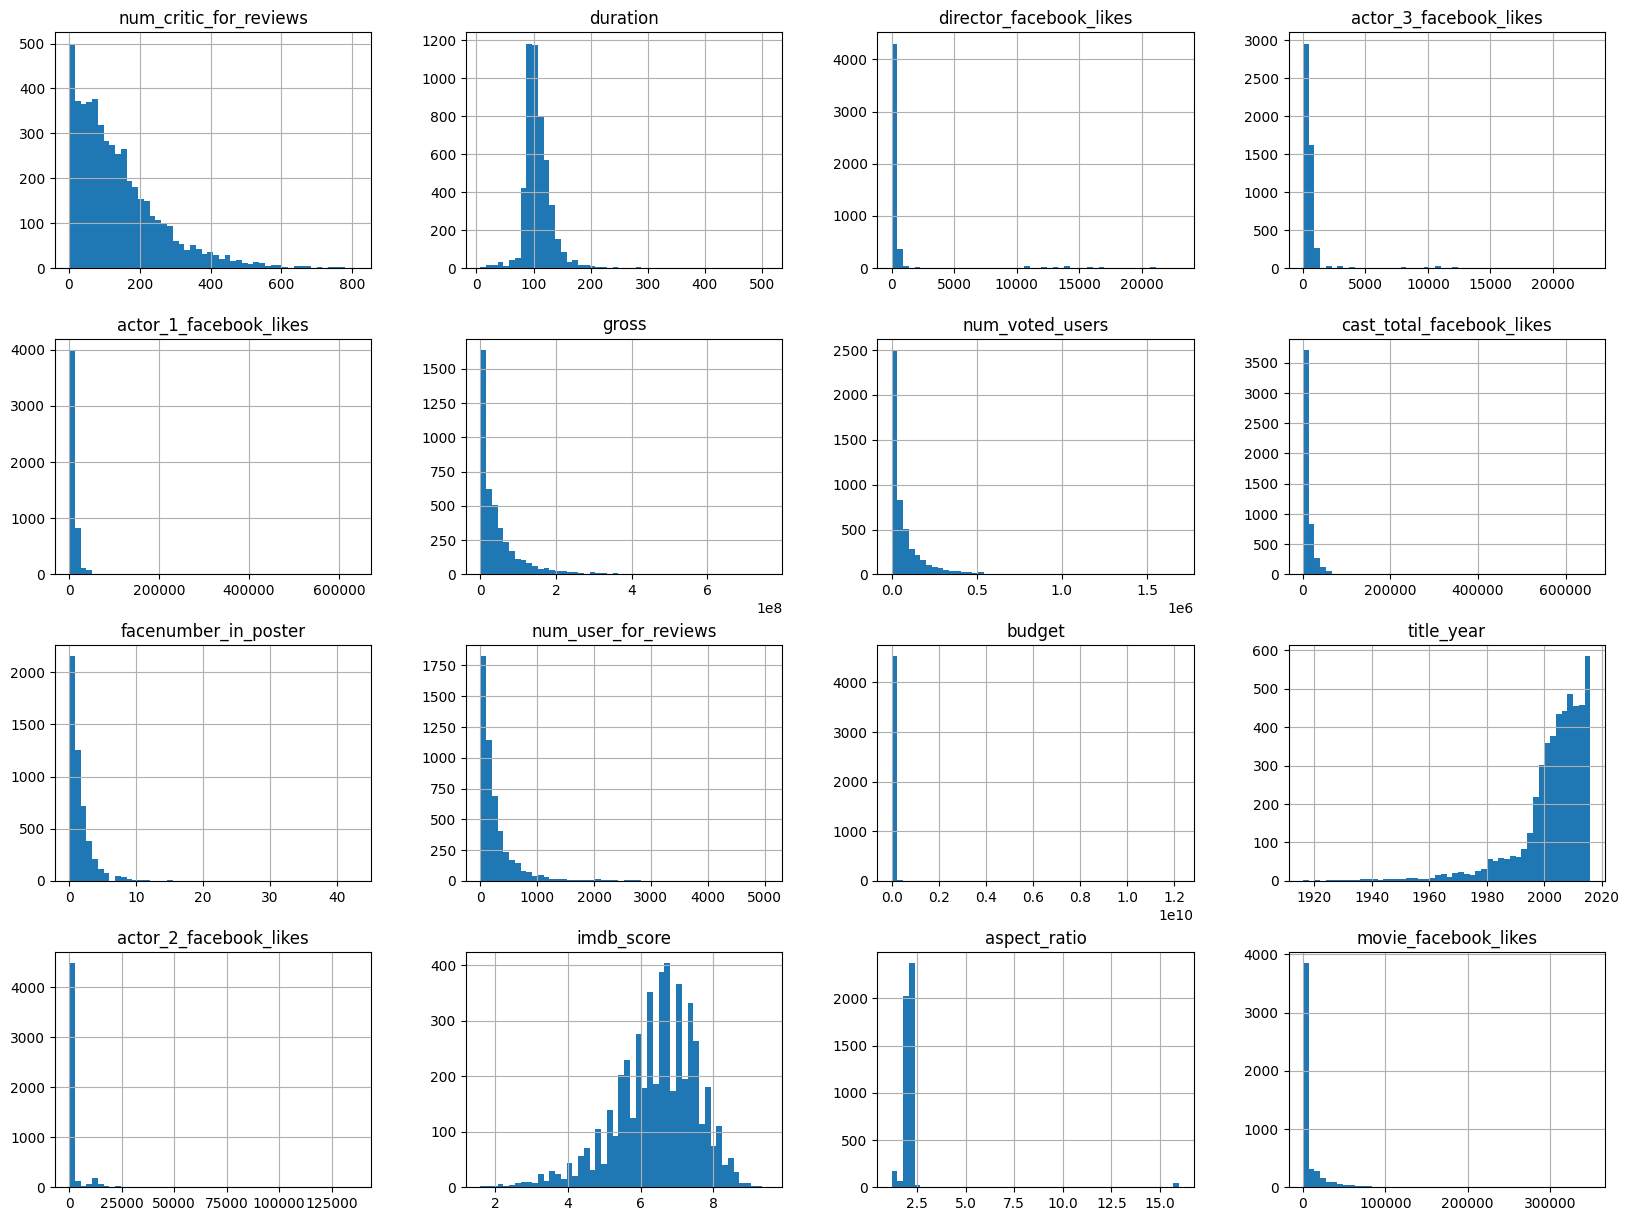

In [4]:
# Plot histograms for each numerical column
df1.hist(bins=50, figsize=(20,15))
plt.show()

In [5]:
# Check for missing values
missing_values = df1.isna().sum()
print(missing_values)

director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64


#
#
#
#
#
### Preprocessing

In [6]:
df2 = data

# Split the data into a train and test set
#train_df2, test_df2 = train_test_split(df2, test_size=0.2, random_state=42)

In [ ]:
# Select the target variable
y = df2["num_critic_for_reviews"]

In [ ]:
# Select only the numerical features
df2 = df2.select_dtypes(include=[np.number])
df2.head()

In [ ]:
# Calculate the correlation matrix
corr_matrix = df2.corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [ ]:
# Select the features that are highly correlated with the target variable (y)
corr_target = abs(corr_matrix["num_critic_for_reviews"])
high_corr_features = corr_target[corr_target > 0.5]
print(high_corr_features)

In [ ]:
# Ignore the features that are highly correlated with each other
X = df2[high_corr_features.index]

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Fill in missing values with the mean
X_train = X_train.fillna(df2.mean())
y_train = y_train.fillna(df2.mean())

#
#
#
### Train Model

In [ ]:
# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

In [ ]:
# Make predictions on the test data
y_pred = model.predict(X_test)

#
#
#
### Evaluate Model

In [ ]:
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)
mspe = mean_absolute_percentage_error(y_test,y_pred)

In [7]:
# Print the mean squared error
print("Mean Squared Error:", mse)
print("Squared Correlation:",r2)
print("Mean Absolute Percentage Error:",mspe)

NameError: name 'mse' is not defined